In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.shape

(10000, 14)

In [7]:
data.Exited.unique()

array([1, 0], dtype=int64)

In [8]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

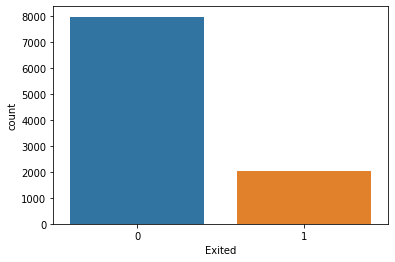

In [9]:
sns.countplot(x=data.Exited)

### Data is imbalanced But We Know That Decision Tree Frequently Perform Well on Imbalanced Data

In [10]:
X=data.iloc[:,3:-1]
y=data.iloc[:,-1]

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [12]:
cat_Dummy1=pd.get_dummies(X['Geography'],drop_first=True)
cat_Dummy1

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
cat_Dummy2=pd.get_dummies(X['Gender'],drop_first=True)
cat_Dummy2

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
X.drop(['Gender','Geography'],axis=1,inplace=True)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [16]:
X=pd.concat([cat_Dummy1,cat_Dummy2,X],axis=1)

In [17]:
X

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,619,42,2,0.00,1,1,1,101348.88
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57
3,0,0,0,699,39,1,0.00,2,0,0,93826.63
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,771,39,5,0.00,2,1,0,96270.64
9996,0,0,1,516,35,10,57369.61,1,1,1,101699.77
9997,0,0,0,709,36,7,0.00,1,0,1,42085.58
9998,1,0,1,772,42,3,75075.31,2,1,0,92888.52


In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=0)
scaler=RobustScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [19]:
train_x=pd.DataFrame(train_x,columns=X.columns)
test_x=pd.DataFrame(test_x,columns=X.columns)

In [20]:
train_x

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,0.0,-0.080882,-0.333333,-0.6,0.396107,1.0,0.0,0.0,-0.447594
1,0.0,0.0,0.0,-0.816176,0.166667,0.4,-0.754142,1.0,0.0,-1.0,-0.812235
2,0.0,0.0,-1.0,-0.455882,3.250000,0.0,0.512443,0.0,-1.0,0.0,-0.872794
3,0.0,1.0,0.0,-1.000000,1.083333,0.0,-0.754142,0.0,-1.0,0.0,0.468210
4,0.0,0.0,-1.0,-1.058824,1.916667,0.4,0.373041,0.0,0.0,0.0,0.300118
...,...,...,...,...,...,...,...,...,...,...,...
6995,1.0,0.0,-1.0,-0.426471,-0.416667,-0.2,0.190606,1.0,0.0,0.0,0.638661
6996,0.0,1.0,-1.0,1.044118,-1.250000,-0.2,0.146272,0.0,0.0,0.0,0.079049
6997,0.0,0.0,0.0,0.632353,-0.166667,0.0,0.514759,1.0,0.0,-1.0,0.825858
6998,0.0,1.0,-1.0,-0.455882,0.083333,0.8,-0.754142,1.0,0.0,0.0,0.494607


In [21]:
test_x

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,-1.0,-0.404412,-0.166667,0.6,0.277359,0.0,0.0,0.0,0.941643
1,0.0,0.0,-1.0,-0.948529,0.250000,-0.6,0.056004,0.0,0.0,-1.0,0.291395
2,0.0,1.0,-1.0,0.397059,0.416667,0.6,-0.003640,0.0,0.0,0.0,-0.245523
3,0.0,0.0,0.0,1.000000,-0.416667,-0.2,0.127698,0.0,-1.0,-1.0,-0.107301
4,1.0,0.0,0.0,0.397059,0.083333,0.0,0.528613,1.0,0.0,0.0,0.361944
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,1.0,-1.0,-0.897059,0.333333,-0.2,-0.754142,1.0,-1.0,0.0,0.483017
2996,0.0,0.0,0.0,-0.095588,3.333333,0.2,-0.117418,1.0,0.0,0.0,-0.447266
2997,0.0,0.0,0.0,0.242647,0.250000,-0.6,0.567690,1.0,0.0,0.0,0.683651
2998,0.0,0.0,0.0,0.294118,2.666667,1.0,0.465033,0.0,0.0,0.0,-0.295017


In [22]:
import xgboost

In [23]:
xg_model=xgboost.XGBClassifier()
xg_model=xg_model.fit(train_x,train_y)

In [24]:
y_pred_test=xg_model.predict(test_x)
y_pred_train=xg_model.predict(train_x)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
print('Test Score',accuracy_score(test_y,y_pred_test))
print('Test Score',accuracy_score(train_y,y_pred_train))

Test Score 0.856
Test Score 0.9601428571428572


In [26]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [27]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [28]:
from sklearn.model_selection import RandomizedSearchCV

RCV=RandomizedSearchCV(xgboost.XGBClassifier(),param_distributions=params,cv=3,n_jobs=-1,verbose=3)

from datetime import datetime

start_time=timer(None)

RCV.fit(train_x,train_y)

timer(start_time)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.2s finished



 Time taken: 0 hours 0 minutes and 14.79 seconds.


In [29]:
y_pred_test_rcv=RCV.predict(test_x)
y_pred_train_rcv=RCV.predict(train_x)

In [30]:
print('Test Score',accuracy_score(test_y,y_pred_test))
print('Test Score',accuracy_score(train_y,y_pred_train))

Test Score 0.856
Test Score 0.9601428571428572


In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2379
           1       0.70      0.53      0.60       621

    accuracy                           0.86      3000
   macro avg       0.79      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



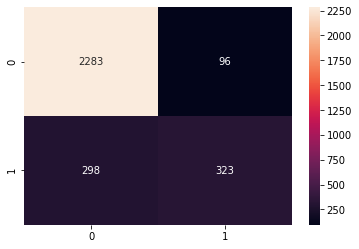

In [32]:
sns.heatmap(confusion_matrix(test_y,y_pred_test_rcv),annot=True,fmt='0.0f')